In [38]:
# imports
import torch
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [39]:
# Load the model, setting pretrained to true since we are using pretrained weights
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Qandeel-Owlsense/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-25 Python-3.8.16 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [40]:
# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Focus(
          (conv): Conv(
            (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32,

In [41]:
# Ask the user for the image file path
input_img = input("Enter path to the input image: ")

In [42]:
# the image/images
images = [input_img]

In [43]:
# Inference
results = model(images)

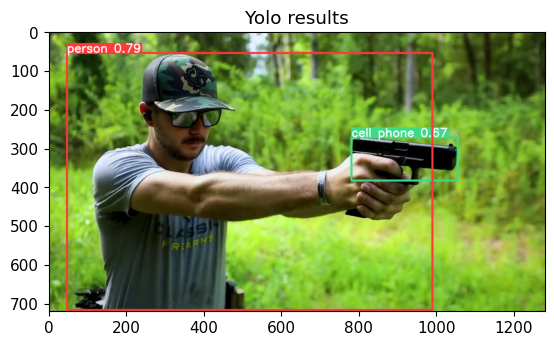

In [44]:
# Display the results. Using plt and np because results.show() is known to not work in some cases, 
# with a known github issue: https://github.com/ultralytics/yolov5/issues/9819
plt.imshow(np.squeeze(results.render()))
plt.title("Yolo results")
plt.show(block=True)

In [45]:
# viewing the results using print
results.print()

image 1/1: 720x1280 1 person, 1 cell phone
Speed: 19.0ms pre-process, 209.3ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


In [46]:
# As we can see, the yolov5 model detected the person correctly. However, it wrongly detected a pistol as a cellphone.